In [65]:
#Importo librerias
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling

#Set de datos utilizado para el proyecto de Fraude 

df = pd.read_csv('transaction_dataset.csv')
print(df.shape)
df.head()

(9841, 51)


,Unnamed: 0,Index,Address,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,...,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
0,0,1,0x00009277775ac7d0d59eaad8fee3d10ac6c805e8,0,844.26,1093.71,704785.63,721,89,0,...,0.000000,1.683100e+07,271779.920000,0.0,0.0,0.0,39.0,57.0,Cofoundit,Numeraire
1,1,2,0x0002b44ddb1476db43c868bd494422ee4c136fed,0,12709.07,2958.44,1218216.73,94,8,0,...,2.260809,2.260809e+00,2.260809,0.0,0.0,0.0,1.0,7.0,Livepeer Token,Livepeer Token
2,2,3,0x0002bda54cb772d040f779e88eb453cac0daa244,0,246194.54,2434.02,516729.30,2,10,0,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,8.0,None,XENON
3,3,4,0x00038e6ba2fd5c09aedb96697c8d7b8fa6632e5e,0,10219.60,15785.09,397555.90,25,9,0,...,100.000000,9.029231e+03,3804.076893,0.0,0.0,0.0,1.0,11.0,Raiden,XENON
4,4,5,0x00062d1dd1afb6fb02540ddad9cdebfe568e0d89,0,36.61,10707.77,382472.42,4598,20,1,...,0.000000,4.500000e+04,13726.659220,0.0,0.0,0.0,6.0,27.0,StatusNetwork,EOS


In [66]:
#Info generica del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9841 entries, 0 to 9840
Data columns (total 51 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Unnamed: 0                                            9841 non-null   int64  
 1   Index                                                 9841 non-null   int64  
 2   Address                                               9841 non-null   object 
 3   FLAG                                                  9841 non-null   int64  
 4   Avg min between sent tnx                              9841 non-null   float64
 5   Avg min between received tnx                          9841 non-null   float64
 6   Time Diff between first and last (Mins)               9841 non-null   float64
 7   Sent tnx                                              9841 non-null   int64  
 8   Received Tnx                                          9841

In [67]:
#Genero estadisticas simples
df.describe()

,Unnamed: 0,Index,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,...,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name
count,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9.841000e+03,9841.000000,9841.000000,9841.000000,9841.000000,...,9.012000e+03,9.012000e+03,9.012000e+03,9.012000e+03,9.012000e+03,9012.0,9012.0,9012.0,9012.000000,9012.000000
mean,4920.000000,1815.049893,0.221421,5086.878721,8004.851184,2.183333e+05,115.931714,163.700945,3.729702,30.360939,...,1.252524e+08,4.346203e+06,1.174126e+04,1.303594e+07,6.318389e+06,0.0,0.0,0.0,1.384931,4.826676
std,2840.996333,1222.621830,0.415224,21486.549974,23081.714801,3.229379e+05,757.226361,940.836550,141.445583,298.621112,...,1.053741e+10,2.141192e+08,1.053567e+06,1.179905e+09,5.914764e+08,0.0,0.0,0.0,6.735121,16.678607
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000
25%,2460.000000,821.000000,0.000000,0.000000,0.000000,3.169300e+02,1.000000,1.000000,0.000000,1.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000
50%,4920.000000,1641.000000,0.000000,17.340000,509.770000,4.663703e+04,3.000000,4.000000,0.000000,2.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,1.000000
75%,7380.000000,2601.000000,0.000000,565.470000,5480.390000,3.040710e+05,11.000000,27.000000,0.000000,5.000000,...,9.900000e+01,2.946467e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,2.000000
max,9840.000000,4729.000000,1.000000,430287.670000,482175.490000,1.954861e+06,10000.000000,10000.000000,9995.000000,9999.000000,...,1.000000e+12,1.724181e+10,1.000000e+08,1.120000e+11,5.614756e+10,0.0,0.0,0.0,213.000000,737.000000


In [68]:
#Muestro la cantidad de valores unicos por columna
for col in df:
    print(f'{col} : {len(df[col].unique())}')

Unnamed: 0 : 9841
Index : 4729
Address : 9816
FLAG : 2
Avg min between sent tnx : 5013
Avg min between received tnx : 6223
Time Diff between first and last (Mins) : 7810
Sent tnx : 641
Received Tnx : 727
Number of Created Contracts : 20
Unique Received From Addresses : 256
Unique Sent To Addresses : 258
min value received : 4589
max value received  : 6302
avg val received : 6767
min val sent : 4719
max val sent : 6647
avg val sent : 5854
min value sent to contract : 3
max val sent to contract : 4
avg value sent to contract : 4
total transactions (including tnx to create contract : 897
total Ether sent : 5868
total ether received : 6728
total ether sent contracts : 4
total ether balance : 5717
 Total ERC20 tnxs : 301
 ERC20 total Ether received : 3461
 ERC20 total ether sent : 1416
 ERC20 total Ether sent contract : 30
 ERC20 uniq sent addr : 108
 ERC20 uniq rec addr : 148
 ERC20 uniq sent addr.1 : 5
 ERC20 uniq rec contract addr : 124
 ERC20 avg time between sent tnx : 2
 ERC20 avg tim

In [69]:
#Chequeo la cantidad de valores NaN por columna 
df.isnull().sum()


Unnamed: 0                                                0
Index                                                     0
Address                                                   0
FLAG                                                      0
Avg min between sent tnx                                  0
Avg min between received tnx                              0
Time Diff between first and last (Mins)                   0
Sent tnx                                                  0
Received Tnx                                              0
Number of Created Contracts                               0
Unique Received From Addresses                            0
Unique Sent To Addresses                                  0
min value received                                        0
max value received                                        0
avg val received                                          0
min val sent                                              0
max val sent                            

In [70]:
# Chequeo la cantidad de "Fraude" o "No fradude" que tiene la columna "Flag"
print(df['FLAG'].value_counts())


0    7662
1    2179
Name: FLAG, dtype: int64


# Limpieza de datos 

In [71]:
#cambiar los valores 0 a nulos, porque un valor 0 no significa nada en las variables categóricas
df[' ERC20_most_rec_token_type'].replace({'0':np.NaN},inplace = True)
df[' ERC20 most sent token type'].replace({'0':np.NaN},inplace = True)

In [72]:
#Promedio de Nan
print(df[' ERC20 most sent token type'].isnull().sum()/len(df))
print(df[' ERC20 most sent token type'].max)

0.5324662127832538
<bound method NDFrame._add_numeric_operations.<locals>.max of 0            Cofoundit
1       Livepeer Token
2                 None
3               Raiden
4        StatusNetwork
             ...      
9836                  
9837                  
9838                  
9839               NaN
9840                  
Name:  ERC20 most sent token type, Length: 9841, dtype: object>


In [73]:
##Promedio de Nan
print(df[' ERC20_most_rec_token_type'].isnull().sum()/len(df))
print(df[' ERC20_most_rec_token_type'].max)

0.5334823696778782
<bound method NDFrame._add_numeric_operations.<locals>.max of 0                              Numeraire
1                         Livepeer Token
2                                  XENON
3                                  XENON
4                                    EOS
                      ...               
9836                          GSENetwork
9837               Blockwell say NOTSAFU
9838    Free BOB Tokens - BobsRepair.com
9839                                 NaN
9840                          INS Promo1
Name:  ERC20_most_rec_token_type, Length: 9841, dtype: object>


# Analisis Target

Text(0.5, 1.0, 'Distribucion de la columna Target')

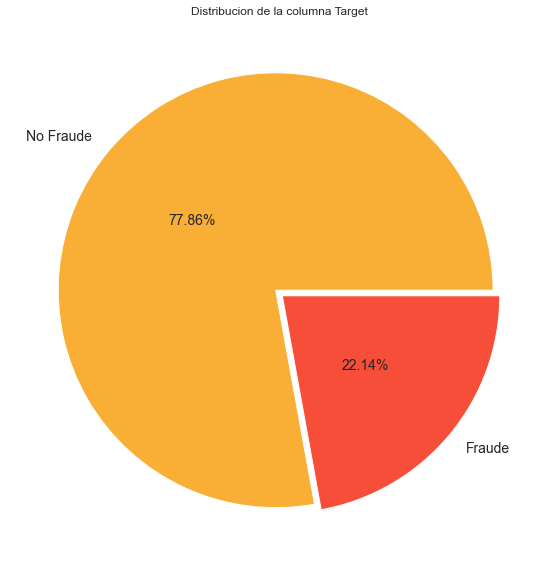

In [74]:
pie, ax = plt.subplots(figsize=[15,10])
labels = ['No Fraude', 'Fraude']
colors = ['#f9ae35', '#f64e38']
plt.pie(x = df['FLAG'].value_counts(), autopct='%.2f%%', explode=[0.02]*2, labels=labels, pctdistance=0.5, textprops={'fontsize': 14}, colors = colors)
plt.title('Distribucion de la columna Target')


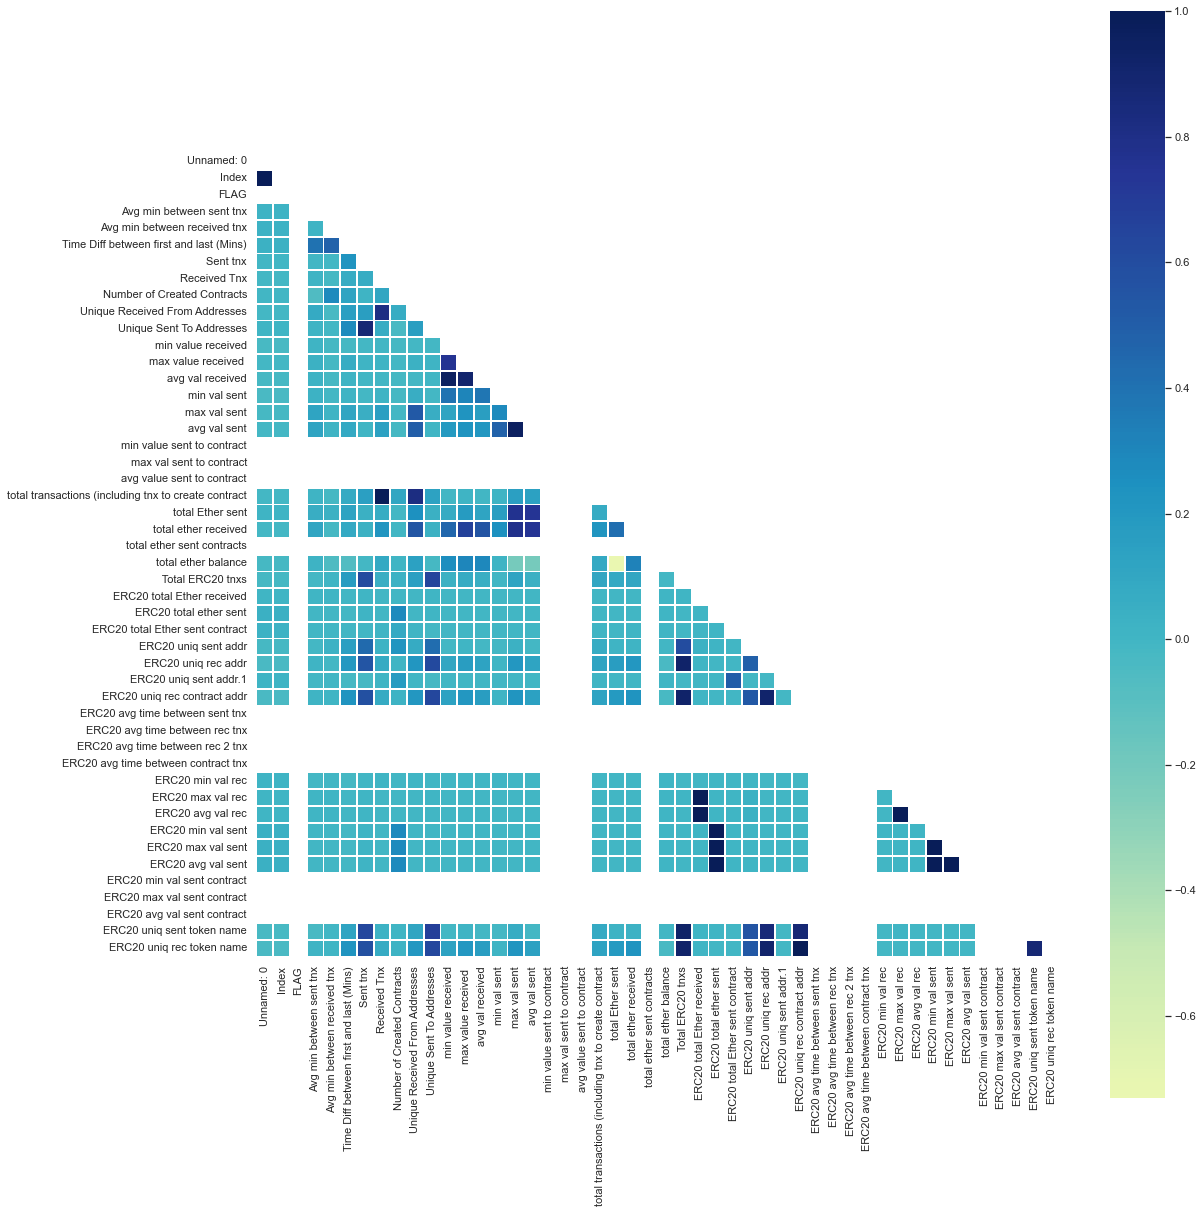

In [75]:
# Correlacion para Fraudes
df_fraud = df[df['FLAG']==1]
corr = df_fraud.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True
with sns.axes_style('white'):
    fig, ax = plt.subplots(figsize=(18,20))
    sns.heatmap(corr,  mask=mask, annot=False, cmap='YlGnBu',center=0, linewidths=0.8, square=True)

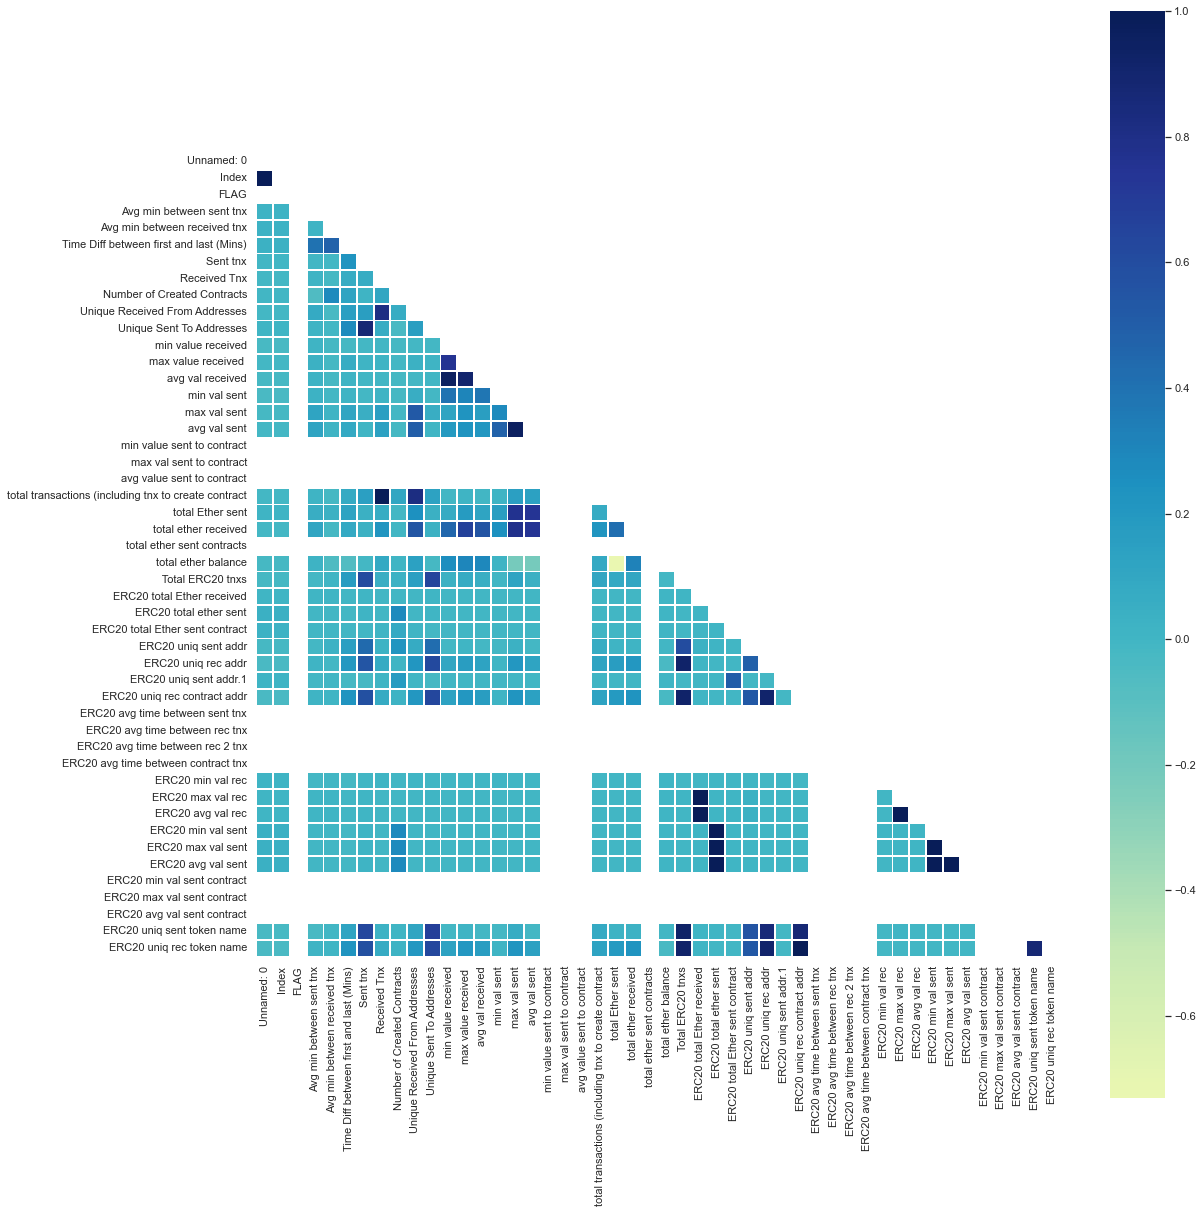

In [76]:
# Correlacion para NO Fraudes
df_not_fraud = df[df['FLAG']==0]
corr = df_fraud.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True
with sns.axes_style('white'):
    fig, ax = plt.subplots(figsize=(18,20))
    sns.heatmap(corr,  mask=mask, annot=False, cmap='YlGnBu',center=0, linewidths=0.8, square=True)

In [77]:
print(f'Procentaje de transacciones no fraudulentas : {len(df.loc[df["FLAG"]==0])/len(df["FLAG"])*100}')
print(f'Procentaje de transacciones fraudulentas : {len(df.loc[df["FLAG"]==1])/len(df["FLAG"])*100}')

Procentaje de transacciones no fraudulentas : 77.85794126613149
Procentaje de transacciones fraudulentas : 22.14205873386851


array([[<AxesSubplot:title={'center':'Unnamed: 0'}>,
        <AxesSubplot:title={'center':'Index'}>,
        <AxesSubplot:title={'center':'FLAG'}>,
        <AxesSubplot:title={'center':'Avg min between sent tnx'}>,
        <AxesSubplot:title={'center':'Avg min between received tnx'}>,
        <AxesSubplot:title={'center':'Time Diff between first and last (Mins)'}>,
        <AxesSubplot:title={'center':'Sent tnx'}>],
       [<AxesSubplot:title={'center':'Received Tnx'}>,
        <AxesSubplot:title={'center':'Number of Created Contracts'}>,
        <AxesSubplot:title={'center':'Unique Received From Addresses'}>,
        <AxesSubplot:title={'center':'Unique Sent To Addresses'}>,
        <AxesSubplot:title={'center':'min value received'}>,
        <AxesSubplot:title={'center':'max value received '}>,
        <AxesSubplot:title={'center':'avg val received'}>],
       [<AxesSubplot:title={'center':'min val sent'}>,
        <AxesSubplot:title={'center':'max val sent'}>,
        <AxesSubplot:t

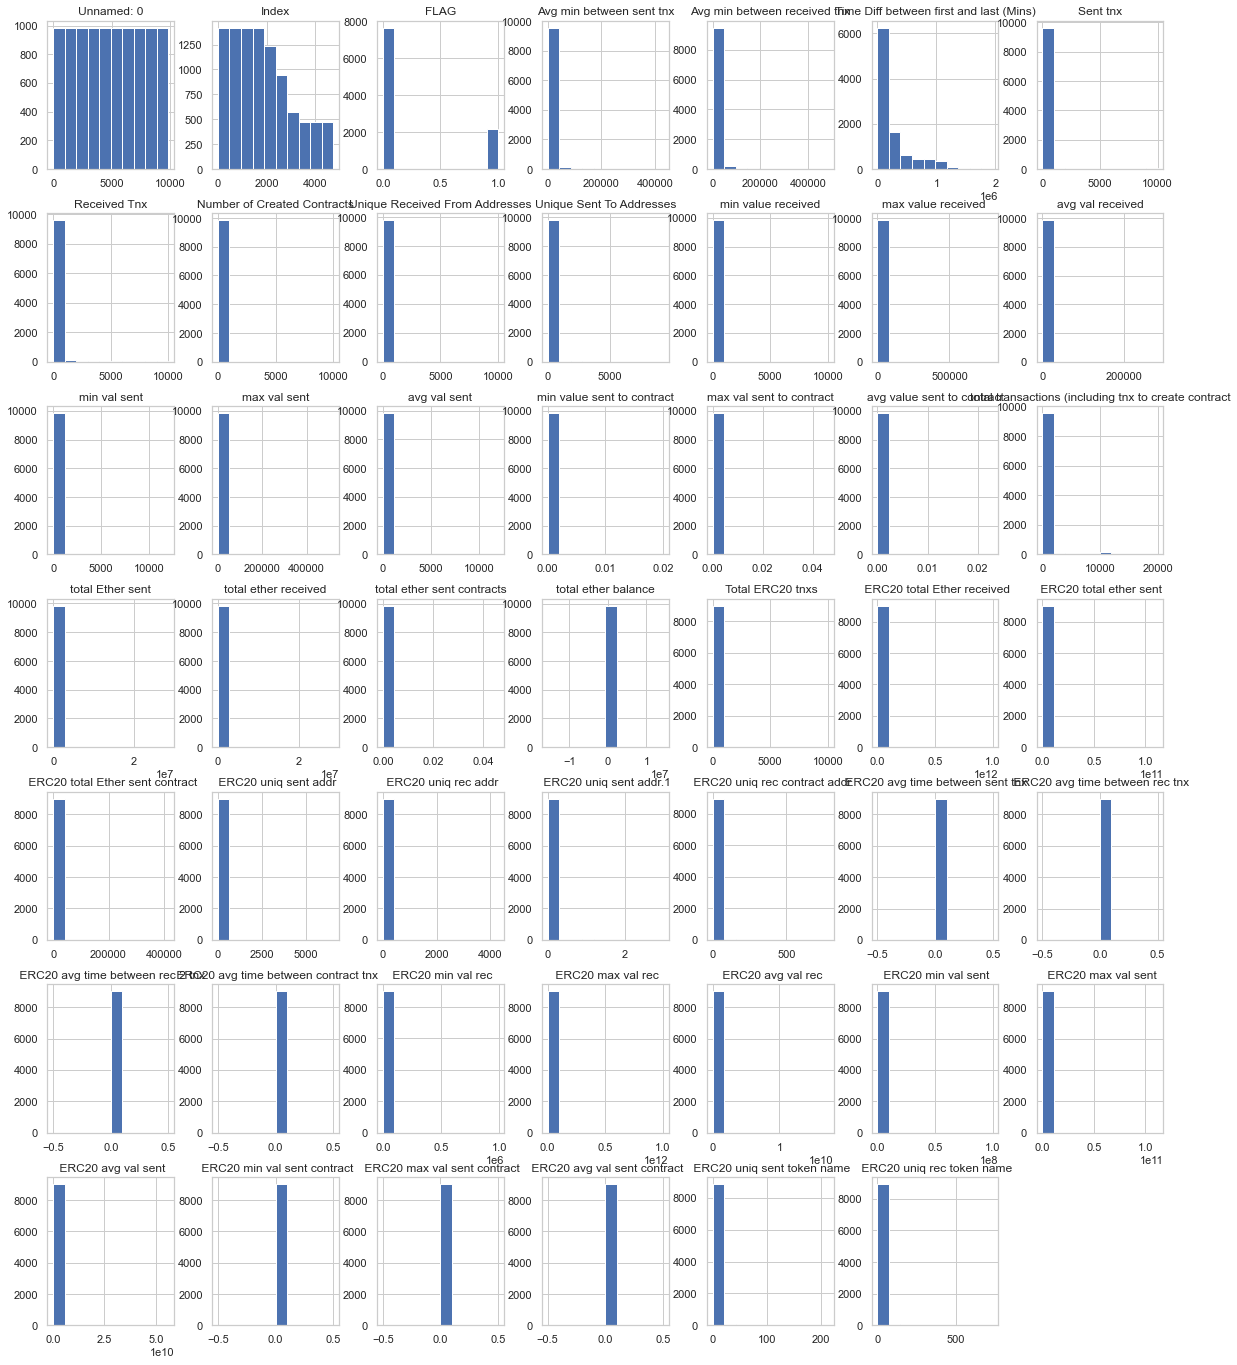

In [78]:
#Genero un grafico para columna , en la cual puedo observar la cantidad de sus distintos valores.
df.hist(figsize=(20,24))

In [79]:
#dropeamos las columnas que tienen valores insignificativos
df.columns


Index(['Unnamed: 0', 'Index', 'Address', 'FLAG', 'Avg min between sent tnx',
       'Avg min between received tnx',
       'Time Diff between first and last (Mins)', 'Sent tnx', 'Received Tnx',
       'Number of Created Contracts', 'Unique Received From Addresses',
       'Unique Sent To Addresses', 'min value received', 'max value received ',
       'avg val received', 'min val sent', 'max val sent', 'avg val sent',
       'min value sent to contract', 'max val sent to contract',
       'avg value sent to contract',
       'total transactions (including tnx to create contract',
       'total Ether sent', 'total ether received',
       'total ether sent contracts', 'total ether balance',
       ' Total ERC20 tnxs', ' ERC20 total Ether received',
       ' ERC20 total ether sent', ' ERC20 total Ether sent contract',
       ' ERC20 uniq sent addr', ' ERC20 uniq rec addr',
       ' ERC20 uniq sent addr.1', ' ERC20 uniq rec contract addr',
       ' ERC20 avg time between sent tnx', ' ERC20 

In [80]:
#Dropeamos las columnas que son insignificativas y no aportan valores. 
columns = ['max val sent to contract','avg value sent to contract','total ether sent contracts',' ERC20 total Ether sent contract',' ERC20 uniq sent addr.1',' ERC20 avg time between sent tnx', ' ERC20 avg time between rec tnx',' ERC20 avg time between rec 2 tnx',' ERC20 avg time between contract tnx',' ERC20 min val sent contract', ' ERC20 max val sent contract',' ERC20 avg val sent contract']
df_copy = df
df.drop(columns, axis =1 , inplace = True)



In [81]:
df.columns

Index(['Unnamed: 0', 'Index', 'Address', 'FLAG', 'Avg min between sent tnx',
       'Avg min between received tnx',
       'Time Diff between first and last (Mins)', 'Sent tnx', 'Received Tnx',
       'Number of Created Contracts', 'Unique Received From Addresses',
       'Unique Sent To Addresses', 'min value received', 'max value received ',
       'avg val received', 'min val sent', 'max val sent', 'avg val sent',
       'min value sent to contract',
       'total transactions (including tnx to create contract',
       'total Ether sent', 'total ether received', 'total ether balance',
       ' Total ERC20 tnxs', ' ERC20 total Ether received',
       ' ERC20 total ether sent', ' ERC20 uniq sent addr',
       ' ERC20 uniq rec addr', ' ERC20 uniq rec contract addr',
       ' ERC20 min val rec', ' ERC20 max val rec', ' ERC20 avg val rec',
       ' ERC20 min val sent', ' ERC20 max val sent', ' ERC20 avg val sent',
       ' ERC20 uniq sent token name', ' ERC20 uniq rec token name',
      

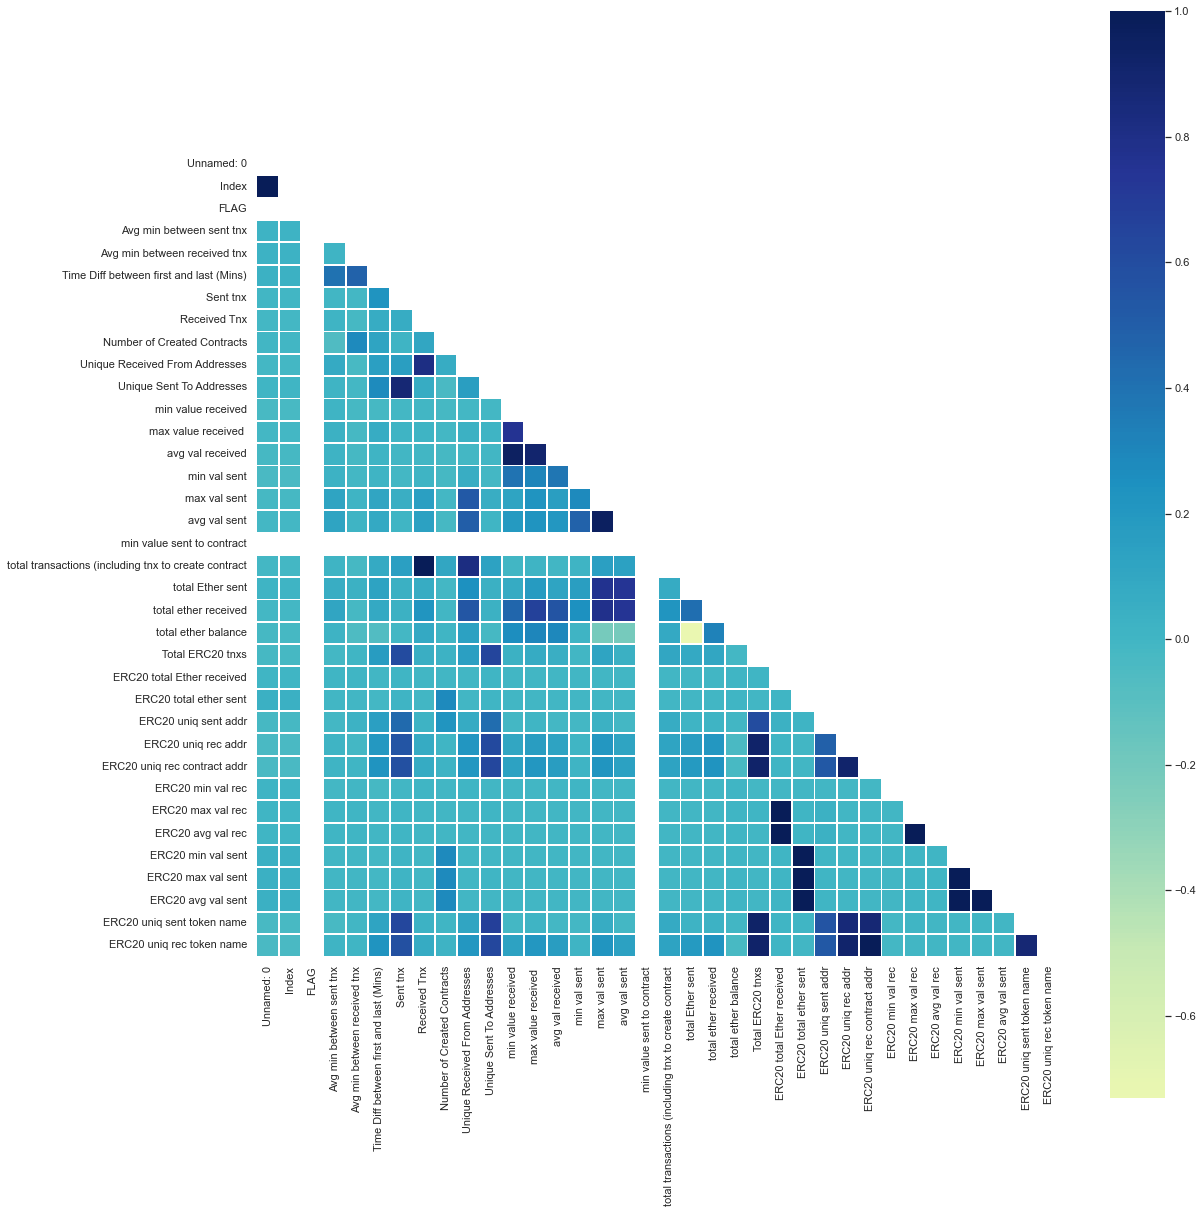

In [82]:
# Correlacion para Fraudes con las columnas limpias
df_fraud = df[df['FLAG']==1]
corr = df_fraud.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True
with sns.axes_style('white'):
    fig, ax = plt.subplots(figsize=(18,20))
    sns.heatmap(corr,  mask=mask, annot=False, cmap='YlGnBu',center=0, linewidths=0.8, square=True)

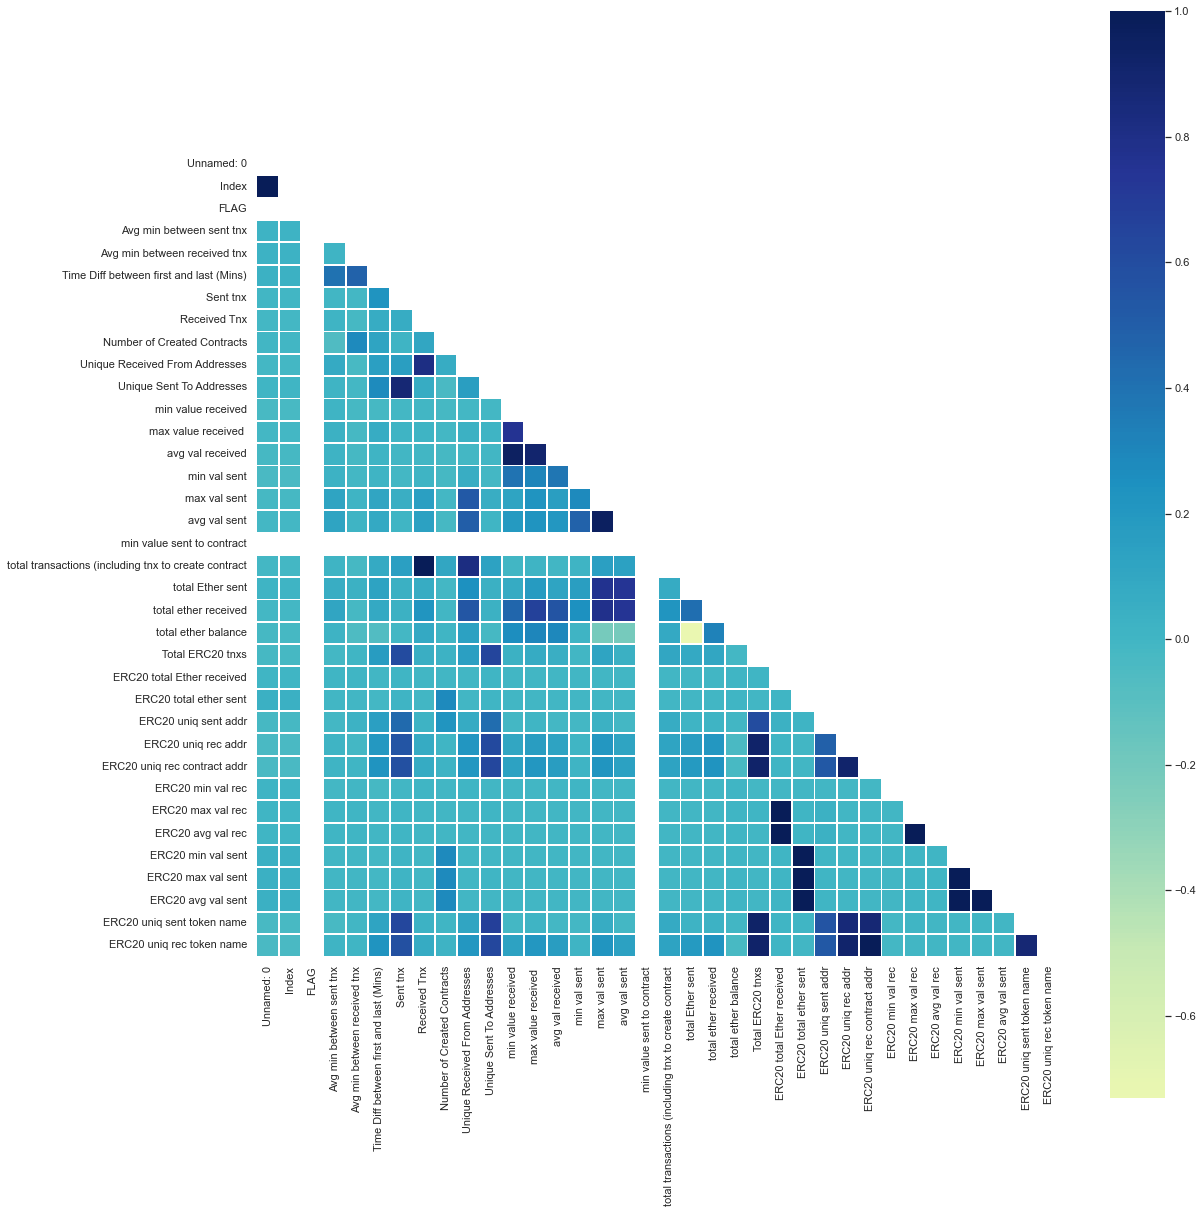

In [83]:
# Correlacion para NO Fraudes con las columnas limpias
df_not_fraud = df[df['FLAG']==0]
corr = df_fraud.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True
with sns.axes_style('white'):
    fig, ax = plt.subplots(figsize=(18,20))
    sns.heatmap(corr,  mask=mask, annot=False, cmap='YlGnBu',center=0, linewidths=0.8, square=True)

# ANALISIS UNIVARIADO


In [84]:
# ERC20 most sent token type
frec = df[' ERC20 most sent token type'].value_counts()
frec_df = pd.DataFrame(frec)
frec_df.rename(columns={' ERC20 most sent token type':'Frec_abs'},inplace=True)
#Obtenemos los valores de las Frecuencias Absolutas
Frec_abs_val = frec_df["Frec_abs"].values

#Creamos una lista vacia en donde vamos a guardar las frecuencias absolutas acumuladas
acum = []

#Iniciamos una variable en la que guardaremos los valores anteriores
valor_acum = 0

#Recorremos la lista  de las frecuencias absolutas para irlas sumando
for i in Frec_abs_val:
    valor_acum = valor_acum + i
    acum.append(valor_acum)
    
frec_df["frec_abs_acum"] = acum

#Calculamos la Frecuencia Relativa en %
frec_df["frec_rel_%"] = 100 * frec_df["Frec_abs"]/len(df[' ERC20 most sent token type'])

#Obtenemos los valores de las Frecuencias Relativas
Frec_rel_val = frec_df["frec_rel_%"].values

#Creamos una lista vacia en donde vamos a guardar las frecuencias relativas acumuladas
acum = []

#Iniciamos una variable  en la que guardaremos los valores anteriores
valor_acum = 0

#Recorremos la lista  de las frecuencias relativas para irlas sumando
for i in Frec_rel_val:
    valor_acum = valor_acum + i
    acum.append(valor_acum)
    
frec_df["frec_rel_%_acum"] = acum
frec_df

,Frec_abs,frec_abs_acum,frec_rel_%,frec_rel_%_acum
None,1856,1856,18.859872,18.859872
,1191,3047,12.102429,30.962301
EOS,138,3185,1.402297,32.364597
OmiseGO,137,3322,1.392135,33.756732
Golem,130,3452,1.321004,35.077736
...,...,...,...,...
Hawala,1,4597,0.010162,46.712732
ethereumAI Token,1,4598,0.010162,46.722894
realchain,1,4599,0.010162,46.733056
BCDN,1,4600,0.010162,46.743217


In [85]:
#' ERC20 most sent token type'
frec = df[' ERC20_most_rec_token_type'].value_counts()
frec_df = pd.DataFrame(frec)
frec_df.rename(columns={' ERC20_most_rec_token_type':'Frec_abs'},inplace=True)
#Obtenemos los valores de las Frecuencias Absolutas
Frec_abs_val = frec_df["Frec_abs"].values

#Creamos una lista vacia en donde vamos a guardar las frecuencias absolutas acumuladas
acum = []

#Iniciamos una variable en la que guardaremos los valores anteriores
valor_acum = 0

#Recorremos la lista  de las frecuencias absolutas para irlas sumando
for i in Frec_abs_val:
    valor_acum = valor_acum + i
    acum.append(valor_acum)
    
frec_df["frec_abs_acum"] = acum

#Calculamos la Frecuencia Relativa en %
frec_df["frec_rel_%"] = 100 * frec_df["Frec_abs"]/len(df[' ERC20_most_rec_token_type'])

#Obtenemos los valores de las Frecuencias Relativas
Frec_rel_val = frec_df["frec_rel_%"].values

#Creamos una lista vacia en donde vamos a guardar las frecuencias relativas acumuladas
acum = []

#Iniciamos una variable  en la que guardaremos los valores anteriores
valor_acum = 0

#Recorremos la lista  de las frecuencias relativas para irlas sumando
for i in Frec_rel_val:
    valor_acum = valor_acum + i
    acum.append(valor_acum)
    
frec_df["frec_rel_%_acum"] = acum
frec_df

,Frec_abs,frec_abs_acum,frec_rel_%,frec_rel_%_acum
OmiseGO,873,873,8.871050,8.871050
Blockwell say NOTSAFU,779,1652,7.915862,16.786912
DATAcoin,358,2010,3.637842,20.424754
Livepeer Token,207,2217,2.103445,22.528198
EOS,161,2378,1.636013,24.164211
...,...,...,...,...
Dignity,1,4587,0.010162,46.611117
Decentralized Application Coin,1,4588,0.010162,46.621278
WhalesburgToken,1,4589,0.010162,46.631440
DALECOIN,1,4590,0.010162,46.641601


<ipython-input-92-3e09aea6302c>:14: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  plt.subplots_adjust(wspace = 0.7, hspace=0.8)


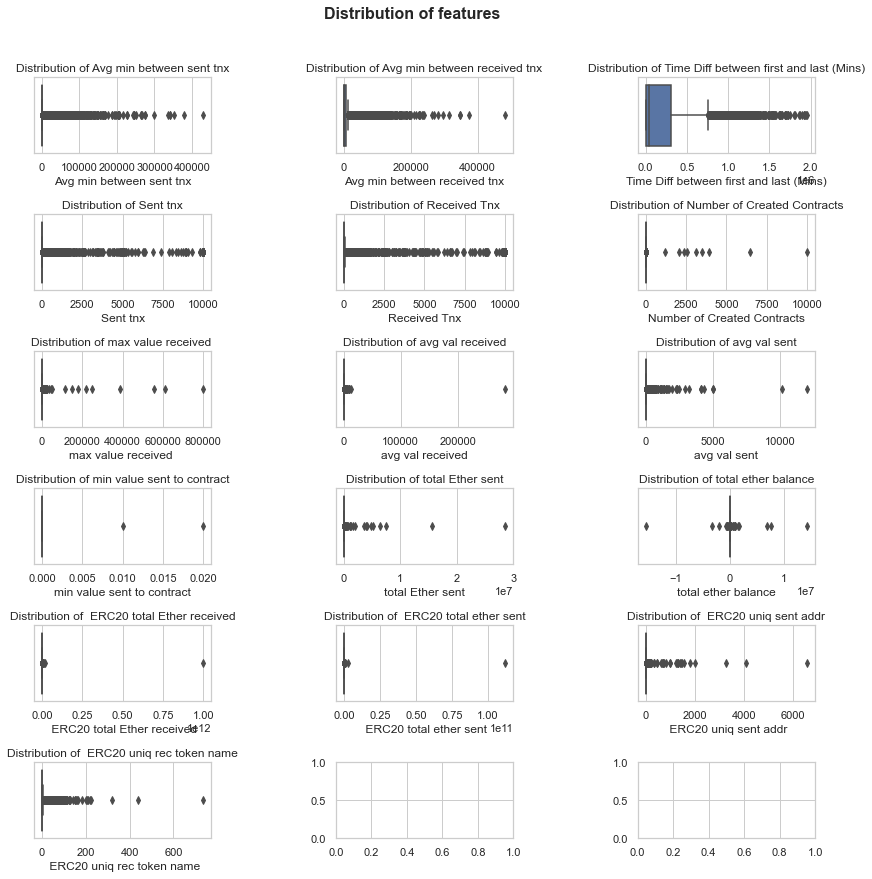

In [92]:
# Analisis de la distribucion usando boxplots
columns = ['FLAG', 'Avg min between sent tnx', 'Avg min between received tnx',
       'Time Diff between first and last (Mins)', 'Sent tnx', 'Received Tnx',
       'Number of Created Contracts', 'max value received ',
       'avg val received', 'avg val sent', 'min value sent to contract',
       'total Ether sent', 'total ether balance',
       ' ERC20 total Ether received', ' ERC20 total ether sent',
        ' ERC20 uniq sent addr',
        ' ERC20 uniq rec token name']



fig, axes = plt.subplots(6, 3, figsize=(14, 14), constrained_layout =True)
plt.subplots_adjust(wspace = 0.7, hspace=0.8)
plt.suptitle("Distribution of features",y=0.95, size=16, weight='bold')

ax = sns.boxplot(ax = axes[0,0], data=df_copy, x=columns[1])
ax.set_title(f'Distribution of {columns[1]}')

ax1 = sns.boxplot(ax = axes[0,1], data=df_copy, x=columns[2])
ax1.set_title(f'Distribution of {columns[2]}')

ax2 = sns.boxplot(ax = axes[0,2], data=df_copy, x=columns[3])
ax2.set_title(f'Distribution of {columns[3]}')

ax3 = sns.boxplot(ax = axes[1,0], data=df_copy, x=columns[4])
ax3.set_title(f'Distribution of {columns[4]}')

ax4 = sns.boxplot(ax = axes[1,1], data=df_copy, x=columns[5])
ax4.set_title(f'Distribution of {columns[5]}')

ax5 = sns.boxplot(ax = axes[1,2], data=df_copy, x=columns[6])
ax5.set_title(f'Distribution of {columns[6]}')

ax6 = sns.boxplot(ax = axes[2,0], data=df_copy, x=columns[7])
ax6.set_title(f'Distribution of {columns[7]}')

ax7 = sns.boxplot(ax = axes[2,1], data=df_copy, x=columns[8])
ax7.set_title(f'Distribution of {columns[8]}')

ax8 = sns.boxplot(ax = axes[2,2], data=df_copy, x=columns[9])
ax8.set_title(f'Distribution of {columns[9]}')

ax9 = sns.boxplot(ax = axes[3,0], data=df_copy, x=columns[10])
ax9.set_title(f'Distribution of {columns[10]}')
 
ax10 = sns.boxplot(ax = axes[3,1], data=df_copy, x=columns[11])
ax10.set_title(f'Distribution of {columns[11]}')

ax11 = sns.boxplot(ax = axes[3,2], data=df_copy, x=columns[12])
ax11.set_title(f'Distribution of {columns[12]}')
 
ax12 = sns.boxplot(ax = axes[4,0], data=df_copy, x=columns[13])
ax12.set_title(f'Distribution of {columns[13]}')
 
ax13 = sns.boxplot(ax = axes[4,1], data=df_copy, x=columns[14])
ax13.set_title(f'Distribution of {columns[14]}')
 
ax14 = sns.boxplot(ax = axes[4,2], data=df_copy, x=columns[15])
ax14.set_title(f'Distribution of {columns[15]}')
 
ax15 = sns.boxplot(ax = axes[5,0], data=df_copy, x=columns[16])
ax15.set_title(f'Distribution of {columns[16]}')
 

plt.show()

# Analisis Bivariado


<AxesSubplot:xlabel='FLAG', ylabel=' ERC20 min val rec'>

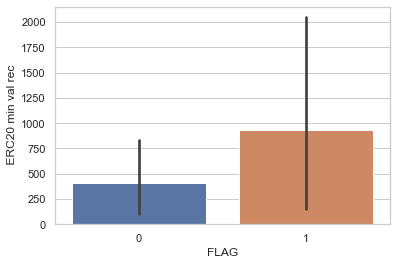

In [93]:
# FLAG VS ERC20 min val rec
sns.barplot(x='FLAG' , y = " ERC20 min val rec", data=df)

<AxesSubplot:xlabel='FLAG', ylabel=' ERC20 max val rec'>

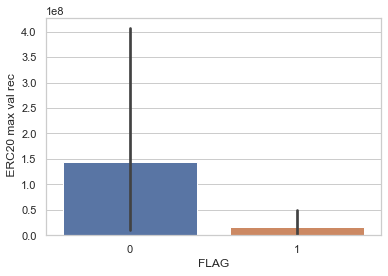

In [94]:
# Flag vs ERC20 max val rec
sns.barplot(x='FLAG' , y = " ERC20 max val rec", data=df)

<AxesSubplot:xlabel='FLAG', ylabel=' ERC20 avg val rec'>

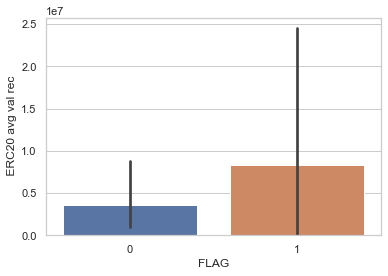

In [95]:
#Flag vs ERC20 avg val rec
sns.barplot(x='FLAG' , y = " ERC20 avg val rec", data=df)

<AxesSubplot:xlabel='FLAG', ylabel=' ERC20 min val sent'>

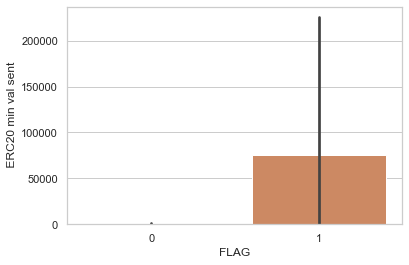

In [96]:
# Flag vs ER20 MIN VAL SENT
sns.barplot(x='FLAG' , y = " ERC20 min val sent", data=df)

<AxesSubplot:xlabel='FLAG', ylabel=' ERC20 max val sent'>

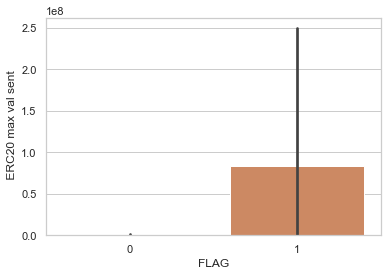

In [97]:
# Flag vs ERC20 max val sent
sns.barplot(x='FLAG' , y = " ERC20 max val sent", data=df)

<AxesSubplot:xlabel='FLAG', ylabel=' ERC20 avg val sent'>

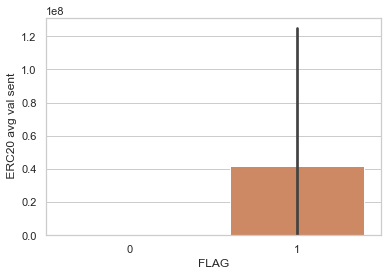

In [98]:
#FLAG vs ERC20 avg val sent
sns.barplot(x='FLAG' , y = " ERC20 avg val sent", data=df)

# Analisis Multivariado

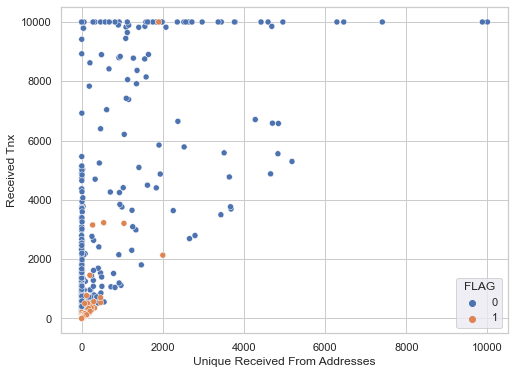

In [101]:
plt.subplots(figsize = (8, 6))
sns.set(style = 'darkgrid')
sns.scatterplot(data = df,x = 'Unique Received From Addresses', y= 'Received Tnx',hue = 'FLAG' )
plt.show()

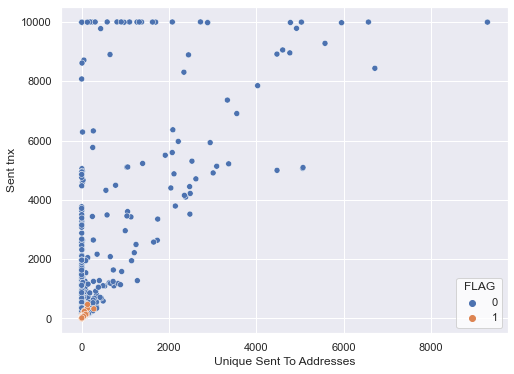

In [102]:
plt.subplots(figsize = (8, 6))
sns.set(style = 'whitegrid')
sns.scatterplot(data = df,x = 'Unique Sent To Addresses', y= 'Sent tnx',hue = 'FLAG' )
plt.show()

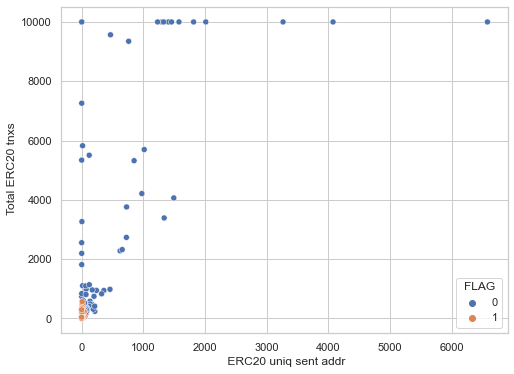

In [103]:
plt.subplots(figsize = (8, 6))
sns.scatterplot(data = df,x = ' ERC20 uniq sent addr', y= ' Total ERC20 tnxs',hue = 'FLAG' )
plt.show()


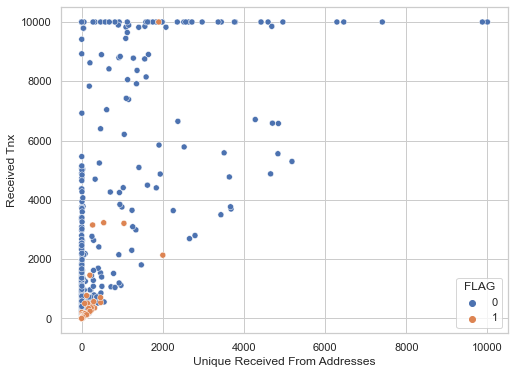

In [104]:
plt.subplots(figsize = (8, 6))
sns.scatterplot(data = df,x = 'Unique Received From Addresses', y= 'Received Tnx',hue = 'FLAG' )
plt.show()

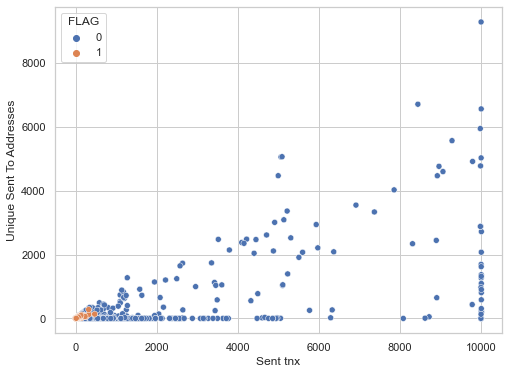

In [105]:
plt.subplots(figsize = (8, 6))
sns.scatterplot(data = df,x = 'Sent tnx', y= 'Unique Sent To Addresses',hue = 'FLAG' )
plt.show()

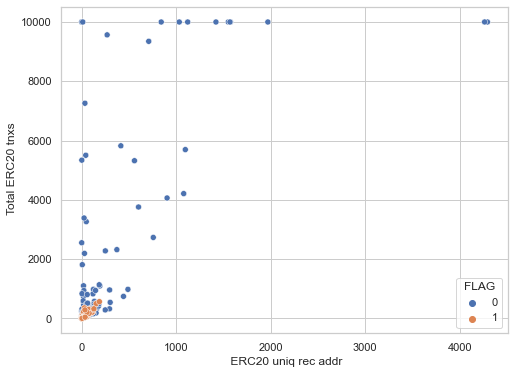

In [106]:
plt.subplots(figsize = (8, 6))
sns.scatterplot(data = df,x = ' ERC20 uniq rec addr', y= ' Total ERC20 tnxs',hue = 'FLAG' )
plt.show()

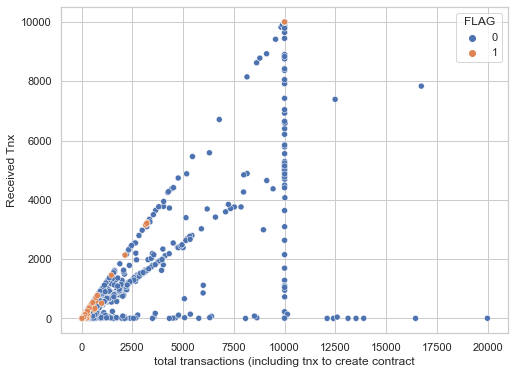

In [107]:
plt.subplots(figsize = (8, 6))
sns.scatterplot(data = df,x = 'total transactions (including tnx to create contract', y= 'Received Tnx',hue = 'FLAG' )
plt.show()

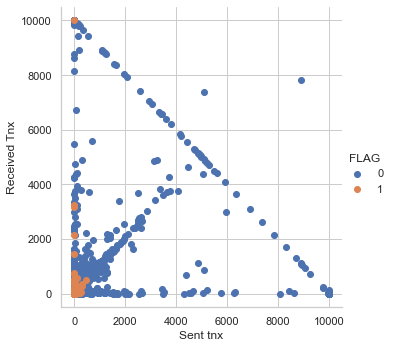

In [108]:
#Analizo la variable target vs los envios de trx y las recividas
sns.FacetGrid(df,hue = 'FLAG' , height = 5 ).map(plt.scatter,'Sent tnx','Received Tnx').add_legend();


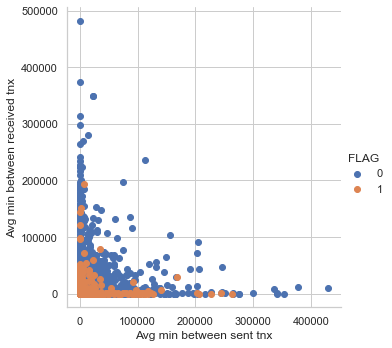

In [109]:
#Analizo la variable targer vs el promedio minimo de enviados y recibidos
sns.FacetGrid(df,hue = 'FLAG' , height = 5 ).map(plt.scatter,'Avg min between sent tnx','Avg min between received tnx').add_legend();

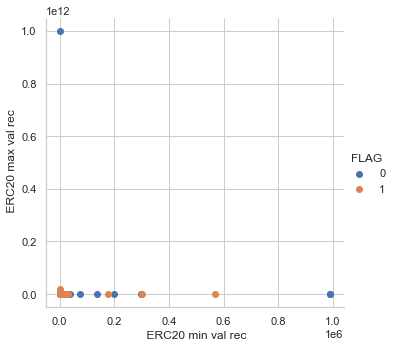

In [110]:
#Analizo la variable target vs ERC20 min val rec y ERC20 max val rec
sns.FacetGrid(df,hue = 'FLAG' , height = 5 ).map(plt.scatter,' ERC20 min val rec',' ERC20 max val rec').add_legend();

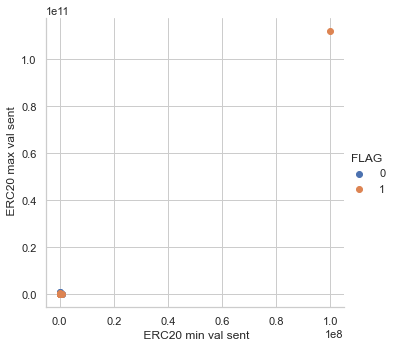

In [111]:
#Analizo la variable target vs ERC20 min val sent y ERC20 max val sent
sns.FacetGrid(df,hue = 'FLAG' , height = 5 ).map(plt.scatter, ' ERC20 min val sent',' ERC20 max val sent').add_legend();


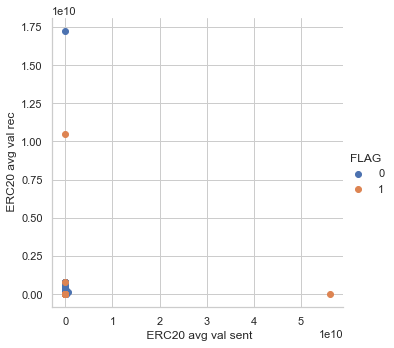

In [112]:
#Analizo la variable target vs ERC20 avg val sent y ERC20 avg val rec
sns.FacetGrid(df,hue = 'FLAG' , height = 5 ).map(plt.scatter, ' ERC20 avg val sent',' ERC20 avg val rec').add_legend();


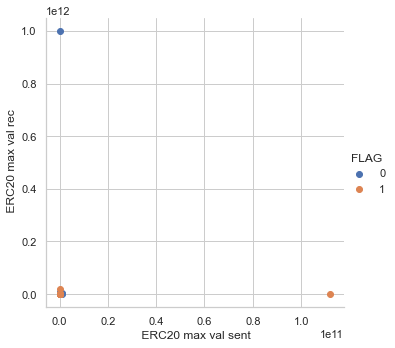

In [113]:
#Analizo la variable target vs ERC20 max val sent y ERC20 max val rec
sns.FacetGrid(df,hue = 'FLAG' , height = 5 ).map(plt.scatter, ' ERC20 max val sent',' ERC20 max val rec').add_legend();

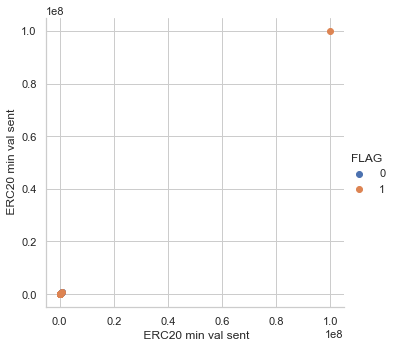

In [114]:
#Analizo la variable target vs ERC20 min val sent y ERC20 min val rec
sns.FacetGrid(df,hue = 'FLAG' , height = 5 ).map(plt.scatter, ' ERC20 min val sent',' ERC20 min val sent').add_legend();

In [37]:
# Variables que tiene mas correlacion con FLAG
df.corr()['FLAG'].sort_values(ascending= False)

FLAG                                                    1.000000
Unnamed: 0                                              0.719153
 ERC20 min val sent                                     0.025364
 ERC20 avg val sent                                     0.025044
 ERC20 max val sent                                     0.025038
 ERC20 total ether sent                                 0.024762
 ERC20 total Ether sent contract                        0.013514
 ERC20 min val rec                                      0.011163
 ERC20 uniq sent token name                             0.009249
 ERC20 avg val rec                                      0.007881
min val sent                                            0.006626
 ERC20 uniq sent addr.1                                -0.003047
total ether balance                                    -0.003229
 ERC20 max val rec                                     -0.004313
 ERC20 total Ether received                            -0.004475
min value sent to contrac